In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from scipy import sparse
from scipy.sparse import csr_matrix
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

C:\Users\GTR\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [354]:
df=pd.read_csv("train_data.csv")

In [355]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [356]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  2


In [357]:
dup_bool = df.duplicated()
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [358]:
print("Total No of Rows ")
print("-"*50)
print(len(df.case_id.unique()))

Total No of Rows 
--------------------------------------------------
318438


In [359]:
df_after_removing_rows = df.dropna(axis=0) # Drop any row with missing values

In [360]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df_after_removing_rows.isnull().any()))

No of Nan values in our dataframe :  0


In [361]:
df_after_removing_rows.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [260]:
df_after_removing_rows.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

# Converting Categorical values into numerical values

In [261]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [134]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [144]:
df_encoded=Encoder(df_after_removing_rows)

In [145]:
df_encoded.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4
5,6,23,0,6,0,2,1,3,5,2.0,31397,7.0,1,0,2,5,4449.0,1
6,7,32,5,9,1,1,3,3,1,3.0,31397,7.0,0,0,2,5,6167.0,0
7,8,23,0,6,0,4,3,1,5,3.0,31397,7.0,1,0,2,5,5571.0,4
8,9,1,3,10,1,2,2,2,1,4.0,31397,7.0,1,0,2,5,7223.0,5
9,10,10,4,1,0,2,2,3,4,3.0,31397,7.0,1,0,2,5,6056.0,3


In [155]:
group_by=df_encoded.groupby(['patientid'])['Available Extra Rooms in Hospital'].sum().reset_index(name ='Total Available Extra Rooms in Hospital')

In [156]:
group_by_deposit=df_encoded.groupby(['patientid'])['Admission_Deposit'].sum().reset_index(name ='Total_Admission_Deposit')

In [157]:
merge1=pd.merge(df_encoded, group_by, how='inner', on='patientid')

In [158]:
merge2=pd.merge(group_by_deposit, merge1, how='inner', on='patientid')

In [160]:
merge2

,patientid,Total_Admission_Deposit,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Total Available Extra Rooms in Hospital
0,1,20856.0,254953,26,1,2,1,4,2,1,3,3.0,8.0,0,1,4,5,4747.0,3,12
1,1,20856.0,254954,3,2,3,2,2,2,2,0,4.0,8.0,1,1,2,5,6139.0,1,12
2,1,20856.0,254955,27,0,7,1,4,2,0,2,3.0,8.0,2,1,2,5,4653.0,1,12
3,1,20856.0,254956,22,6,9,1,2,2,3,1,3.0,8.0,2,1,2,5,5317.0,1,12
4,2,11452.0,71207,21,2,3,2,4,2,3,0,2.0,8.0,0,1,2,4,5827.0,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313788,131623,8355.0,270877,27,0,7,1,2,2,2,2,1.0,2.0,1,2,2,6,4618.0,2,4
313789,131623,8355.0,270878,23,0,6,0,2,2,3,5,1.0,2.0,0,0,2,6,3737.0,0,4
313790,131624,13066.0,199912,6,0,6,0,3,2,2,5,4.0,2.0,0,1,6,3,4199.0,3,11
313791,131624,13066.0,199913,26,1,2,1,4,2,0,3,2.0,2.0,0,1,5,3,4603.0,0,11


# Train and Test Split

In [179]:
Y=merge2["Stay"]

In [180]:
X=merge2.drop(['case_id','Stay','patientid'], axis=1)

In [181]:
X.head()

,Total_Admission_Deposit,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Total Available Extra Rooms in Hospital
0,20856.0,26,1,2,1,4,2,1,3,3.0,8.0,0,1,4,5,4747.0,12
1,20856.0,3,2,3,2,2,2,2,0,4.0,8.0,1,1,2,5,6139.0,12
2,20856.0,27,0,7,1,4,2,0,2,3.0,8.0,2,1,2,5,4653.0,12
3,20856.0,22,6,9,1,2,2,3,1,3.0,8.0,2,1,2,5,5317.0,12
4,11452.0,21,2,3,2,4,2,3,0,2.0,8.0,0,1,2,4,5827.0,7


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [183]:
X_train.head()

,Total_Admission_Deposit,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Total Available Extra Rooms in Hospital
164207,39197.0,11,1,2,1,2,2,1,3,4.0,2.0,1,0,2,6,4998.0,17
261317,17898.0,25,4,1,0,2,3,3,4,3.0,5.0,0,1,4,1,6873.0,6
15363,32098.0,24,0,1,0,3,2,2,4,4.0,1.0,2,2,6,1,4173.0,24
253458,10502.0,11,1,2,1,5,2,1,3,3.0,8.0,0,2,4,3,5920.0,10
30267,14516.0,24,0,1,0,2,3,2,4,3.0,8.0,1,1,2,7,4829.0,9


In [184]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [185]:
X_train.shape

(219655, 17)

In [186]:
X_test.shape

(94138, 17)

# SVM

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='hinge')
alpha = [0.00001,0.001,0.01,0.1]
penalty=['l1','l2']
param_grid = {'alpha':alpha,'penalty':penalty}
knn_cv = GridSearchCV(clf, param_grid, cv=5,scoring='f1_macro')
knn_cv.fit(X_train, Y_train) 
knn_cv.best_params_

{'alpha': 0.01, 'penalty': 'l2'}

In [84]:
from sklearn import linear_model
from sklearn.calibration  import CalibratedClassifierCV
alpha_optimal = linear_model.SGDClassifier(alpha=0.01,loss='hinge',penalty='l2')

alpha_optimal.fit(X_train, Y_train)
# predict the response
pred = alpha_optimal.predict(X_test)

[[  465  3114  1506   417   726   545     0    96     4     0     0]
 [  951 10878  5177  1742  1899  2147     0   438    21     0     1]
 [  756 11023  7348  1905  2826  1748     0   318    18     0    63]
 [  471  5395  3065  1286  1563  3908     0   546    33     0    67]
 [  107  1197   845   317   407   464     0    59     6     0    33]
 [  255  2230  1106   619   892  4289     0   590    41     0   306]
 [   27   251   174    83    82   141     0    19     2     0    34]
 [   77   594   251   218   252  1091     0   164    11     0   297]
 [   18   109    61    57    41   722     0    94    18     0   298]
 [   15   170    63    55    77   264     0    36     3     0   129]
 [   22   153   106    70    65   490     0    99     7     0   899]]


C:\Users\GTR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GTR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GTR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.15      0.07      0.09      6873
           1       0.31      0.47      0.37     23254
           2       0.37      0.28      0.32     26005
           3       0.19      0.08      0.11     16334
           4       0.05      0.12      0.07      3435
           5       0.27      0.42      0.33     10328
           6       0.00      0.00      0.00       813
           7       0.07      0.06      0.06      2955
           8       0.11      0.01      0.02      1418
           9       0.00      0.00      0.00       812
          10       0.42      0.47      0.45      1911

    accuracy                           0.27     94138
   macro avg       0.18      0.18      0.17     94138
weighted avg       0.27      0.27      0.26     94138



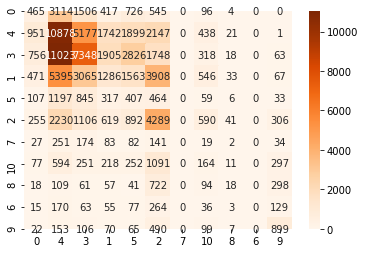

In [85]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test, pred)
labels=df_after_removing_rows['Stay'].unique()
print(confm)
df_cm = DataFrame(confm, index=labels, columns=df_after_removing_rows['Stay'].unique())

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test, pred, average='macro') 
print(classification_report(Y_test, pred))

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators  = [10,30,50,70,90]
max_depth =[10,30,50,70,90]
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth }
RF = RandomForestClassifier()
knn_cv = GridSearchCV(RF, param_grid, cv=3,scoring='roc_auc')
knn_cv.fit(X_train, y_train) 
knn_cv.best_params_

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=200, max_depth=90)

# fitting the model
model.fit(X_train, Y_train)

# predict the response
pred = model.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of Random Forest is %f%%' % (acc))


The accuracy of Random Forest is 41.342497%


[[ 1209  3012  2432   172    14    31     1     3     0     0     3]
 [  870 11108  8969  1440    36   769     4    17     6     1     8]
 [  597  7776 15708  1118    66   410     6    11    40     2    25]
 [  311  3088  5974  4214    47  2601     6    75    21     5    38]
 [  113   720  1910   412    37   256     2    13    10     1    21]
 [  122   742  1355  2588    18  5084     9   158   183     8   125]
 [   28   117   372   105     4   111    24     9     6     0    19]
 [   45   194   277   609     3  1448     1   251    27     5   193]
 [   19    42    73   167     2   661     2    16   281     0   134]
 [    8    41    83   145     4   384     0    20     2    58    97]
 [   25    64    87   119     1   531     1    34   103    10   945]]
              precision    recall  f1-score   support

           0       0.36      0.18      0.24      6877
           1       0.41      0.48      0.44     23228
           2       0.42      0.61      0.50     25759
           3       0.38

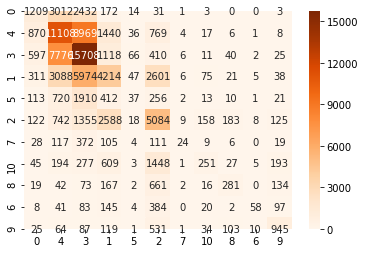

In [190]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test, pred)
labels=df_after_removing_rows['Stay'].unique()
print(confm)
df_cm = DataFrame(confm, index=labels, columns=df_after_removing_rows['Stay'].unique())

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test, pred, average='weighted') 
print(classification_report(Y_test, pred))

# Feature Importances

In [191]:
import pandas as pd
imp_features=(dict(zip(X.columns, model.feature_importances_)))
dictionary=dict(sorted(imp_features.items(), key=lambda kv: kv[1],reverse=True)[:20])
print(dictionary)

{'Admission_Deposit': 0.16529715072086895, 'Total_Admission_Deposit': 0.15514777368051988, 'Total Available Extra Rooms in Hospital': 0.11749027028407003, 'Visitors with Patient': 0.08556357516774092, 'Age': 0.08447695700911091, 'City_Code_Patient': 0.07867680311932794, 'Available Extra Rooms in Hospital': 0.052271003243147464, 'Hospital_code': 0.041605211735797766, 'Bed Grade': 0.03784154089229389, 'Ward_Type': 0.034782422484196024, 'Department': 0.032129546864255926, 'Severity of Illness': 0.03131252231158431, 'Type of Admission': 0.022732411973535527, 'City_Code_Hospital': 0.02053472090516314, 'Hospital_type_code': 0.01643400179344094, 'Ward_Facility_Code': 0.014719180519246606, 'Hospital_region_code': 0.008984907295699753}


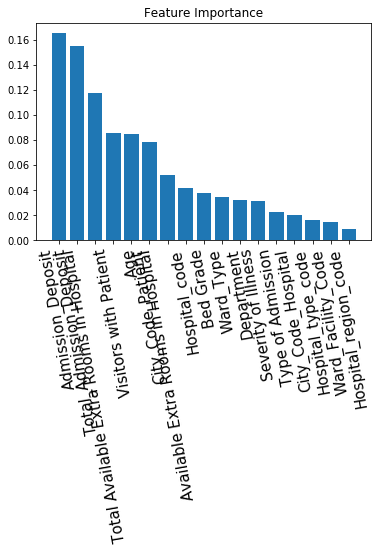

In [192]:
from matplotlib import pyplot
label=[]
label=(dictionary.keys())
values=(dictionary.values())
index = np.arange(len(label))
plt.bar(index, values)
plt.xticks(index, label, fontsize=15, rotation=100)
plt.title('Feature Importance')
plt.show()

# Predicting Test Data Output

In [370]:
df=pd.read_csv("test_data.csv")

In [332]:
# make an encoder object
encoder = LabelEncoder()
columnsToEncode = list(df.select_dtypes(include=['category','object']))
for col in columnsToEncode:
    print(col)
    encoder.fit(df_after_removing_rows[col])
    df_after_removing_rows[col] = encoder.transform(df_after_removing_rows[col])
    df[col] = encoder.fit_transform(df[col])
    

In [333]:
group_by=df.groupby(['patientid'])['Available Extra Rooms in Hospital'].sum().reset_index(name ='Total Available Extra Rooms in Hospital')
group_by_deposit=df.groupby(['patientid'])['Admission_Deposit'].sum().reset_index(name ='Total_Admission_Deposit')
merge1=pd.merge(df, group_by, how='inner', on='patientid')
merge2=pd.merge(group_by_deposit, merge1, how='inner', on='patientid')

In [334]:
X=merge2.drop(['case_id','patientid'], axis=1)

In [335]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(X.isnull().any()))

No of Nan values in our dataframe :  2


In [336]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X=imp.transform(X)

In [337]:
# predict the response using Random Forest Model
pred = model.predict(X)

In [362]:
# make an encoder object
encoder = LabelEncoder()
encoder.fit(df_after_removing_rows['Stay'])
encoder.transform(df_after_removing_rows['Stay'])

array([0, 4, 3, ..., 1, 1, 0])

In [363]:
original_labels=encoder.inverse_transform(pred)

In [371]:
df2 = pd.DataFrame(columns=['case_id', 'Stay'])

In [372]:
df2["case_id"]=df["case_id"]

In [373]:
df2["Stay"]=original_labels

In [374]:
df2.to_csv("sample_submission.csv",index=0)

In [375]:
df2.shape

(137057, 2)